# 4 & 5 - Preprocessing & Modeling

## Preprocessing

In [31]:
import pandas as pd
import numpy as np
import pickle
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

df = pd.read_csv('Data/clean-nyccds', index_col=0)

In [32]:
df.head()

,cd_short_title,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,female_10_14,female_15_19,...,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_change_00_10,poverty_rate,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro
0,Manhattan CD 1,1725,45629,10,2,13,19,6.8,1.1,2.4,...,100,72.2,34420,60978,0.77,8.8,12.7,14.4,20.9,3.8
1,Manhattan CD 2,5256,60610,19,3,6,8,15.0,1.1,2.4,...,100,72.2,93119,90016,-0.03,8.8,12.7,14.4,20.9,3.8
2,Manhattan CD 3,4644,82557,41,5,13,42,15.2,1.5,2.9,...,100,33.3,164407,163277,-0.01,19.3,11.4,14.4,20.9,3.8
3,Manhattan CD 4,3829,85706,38,2,7,29,18.1,0.9,1.7,...,94,59.1,87479,103245,0.18,11.3,8.2,14.4,20.9,3.8
4,Manhattan CD 5,3127,49436,23,7,3,13,29.4,0.9,1.7,...,95,59.1,44028,51673,0.17,11.3,8.2,14.4,20.9,3.8


In [33]:
df.describe()

,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,female_10_14,female_15_19,female_20_24,...,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_change_00_10,poverty_rate,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro
count,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,59.000000,5.900000e+01,59.000000
mean,18464.254237,61025.915254,22.898305,3.677966,6.915254,25.694915,10.205085,2.667797,2.720339,3.540678,...,83.779661,32.264407,135681.491525,138503.050847,0.038475,19.940678,20.872881,21.016949,2.090000e+01,4.488136
std,16401.896106,21819.461407,13.101323,1.665478,4.035567,8.987068,4.627594,0.838603,0.683243,0.844887,...,15.419499,24.355979,45806.188054,43455.936765,0.111801,6.824982,5.383334,3.745487,3.583210e-15,0.992226
min,1725.000000,20518.000000,1.000000,1.000000,1.000000,8.000000,2.600000,0.900000,1.100000,1.800000,...,39.000000,1.100000,34420.000000,51673.000000,-0.100000,7.200000,8.200000,14.400000,2.090000e+01,2.800000
25%,4633.500000,47148.500000,12.000000,2.500000,4.000000,19.500000,7.250000,2.200000,2.300000,3.000000,...,73.000000,10.650000,105239.000000,107451.000000,0.000000,15.000000,18.150000,20.300000,2.090000e+01,3.900000
50%,14476.000000,56013.000000,19.000000,3.000000,6.000000,23.000000,8.800000,2.600000,2.700000,3.500000,...,87.000000,27.500000,128313.000000,132003.000000,0.020000,20.200000,21.300000,23.100000,2.090000e+01,4.400000
75%,24828.000000,66646.500000,32.000000,4.500000,8.500000,31.000000,12.350000,3.300000,3.100000,4.000000,...,98.500000,53.150000,166458.000000,171937.000000,0.055000,24.600000,23.700000,23.100000,2.090000e+01,4.400000
max,70686.000000,151357.000000,54.000000,9.000000,20.000000,47.000000,29.400000,4.800000,4.200000,6.900000,...,100.000000,82.900000,242952.000000,247354.000000,0.770000,35.600000,36.800000,25.100000,2.090000e+01,6.300000


In [34]:
df.drop([col for col in df.columns if 'nyc' in col],axis=1,inplace=True)
df.drop([col for col in df.columns if 'boro' in col],axis=1,inplace=True)

I'm going to jump right in with a simple KMeans clustering algorithm to divide the city neighborhoods up into different groups and see which groups Beanie Coffee Shops are currently located in.

In [44]:
from sklearn.preprocessing import StandardScaler

x=df.drop(columns=('cd_short_title'))

scaler = StandardScaler()
X = scaler.fit_transform(x)

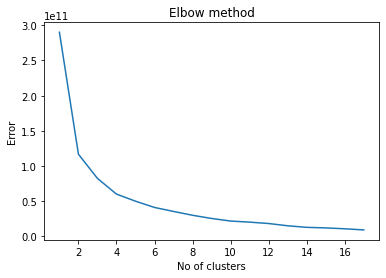

In [56]:
from sklearn.cluster import KMeans
Error =[]
for i in range(1, 18):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 18), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

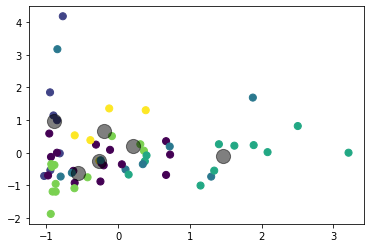

In [107]:
kmeans6 = KMeans(n_clusters=6)
y_kmeans6 = kmeans6.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans6, s=50, cmap='viridis')

centers = kmeans6.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [108]:
df['cluster'] = y_kmeans6

In [109]:
df[['cd_short_title','cluster']].to_csv('basic_neighborhood_clusters')
#saving this to display in tableau map for the report

In [110]:
df2 = pd.read_csv('Data/clean_locations.csv', index_col=0)
df2.head()

,sales_outlet_id,sales_outlet_type,store_square_feet,store_postal_code,store_longitude,store_latitude,Neighorhood,CD
1,3,existing,1300,11106,-73.924008,40.761196,Astoria,Queens CD 1
2,4,potential,1300,11215,-73.983984,40.677645,Gowanus,Brooklyn CD 6
3,5,existing,900,10007,-74.010130,40.713290,Lower Manhattan,Manhattan CD 1
4,6,potential,1000,10002,-73.992687,40.713852,Lower East Side,Manhattan CD 3
5,7,potential,1200,10021,-73.960000,40.770000,Upper East Side,Manhattan CD 6


In [111]:
df2.merge(df[['cd_short_title','cluster']], how="left", left_on='CD', right_on='cd_short_title')

,sales_outlet_id,sales_outlet_type,store_square_feet,store_postal_code,store_longitude,store_latitude,Neighorhood,CD,cd_short_title,cluster
0,3,existing,1300,11106,-73.924008,40.761196,Astoria,Queens CD 1,Queens CD 1,5
1,4,potential,1300,11215,-73.983984,40.677645,Gowanus,Brooklyn CD 6,Brooklyn CD 6,5
2,5,existing,900,10007,-74.010130,40.713290,Lower Manhattan,Manhattan CD 1,Manhattan CD 1,1
3,6,potential,1000,10002,-73.992687,40.713852,Lower East Side,Manhattan CD 3,Manhattan CD 3,1
4,7,potential,1200,10021,-73.960000,40.770000,Upper East Side,Manhattan CD 6,Manhattan CD 6,1
5,8,existing,1500,10036,-73.990338,40.761887,Chelsea and Clinton,Manhattan CD 4,Manhattan CD 4,1
6,9,potential,1700,10011,-74.000502,40.742760,Chelsea and Clinton,Manhattan CD 4,Manhattan CD 4,1
7,10,potential,1600,10014,-74.002722,40.734367,Greenwich Village,Manhattan CD 2,Manhattan CD 2,1


Now we can see the that there are two kinds of neighborhoods that we're seeing our existing stores in (1 and 5), and two of our existing stores are in cluster 1, one in cluster five. Our potential locations show 1 potential location in cluster 5 and the rest in cluster 1. 

In [126]:
cluster1 = df[df.cluster == 1]
cluster5 = df[df.cluster==5]
cluster1.head(10)

,cd_short_title,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,female_10_14,female_15_19,...,pct_black_nh,pct_asian_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_change_00_10,poverty_rate,under18_rate,cluster
0,Manhattan CD 1,1725,45629,10,2,13,19,6.8,1.1,2.4,...,2.2,15.5,100,72.2,34420,60978,0.77,8.8,12.7,1
1,Manhattan CD 2,5256,60610,19,3,6,8,15.0,1.1,2.4,...,2.2,15.5,100,72.2,93119,90016,-0.03,8.8,12.7,1
2,Manhattan CD 3,4644,82557,41,5,13,42,15.2,1.5,2.9,...,8.4,30.6,100,33.3,164407,163277,-0.01,19.3,11.4,1
3,Manhattan CD 4,3829,85706,38,2,7,29,18.1,0.9,1.7,...,5.2,17.2,94,59.1,87479,103245,0.18,11.3,8.2,1
4,Manhattan CD 5,3127,49436,23,7,3,13,29.4,0.9,1.7,...,5.2,17.2,95,59.1,44028,51673,0.17,11.3,8.2,1
5,Manhattan CD 6,3056,100985,48,3,6,16,11.7,1.0,2.0,...,3.4,16.6,91,69.7,136152,142745,0.05,9.8,8.8,1
7,Manhattan CD 8,5950,151357,40,5,18,20,10.2,1.6,1.1,...,2.3,10.2,95,75.3,217063,219920,0.01,7.2,14.6,1


In [127]:
cluster5.head(10)

,cd_short_title,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_per_1000,female_10_14,female_15_19,...,pct_black_nh,pct_asian_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_change_00_10,poverty_rate,under18_rate,cluster
24,Brooklyn CD 1,16461,90331,26,4,11,32,12.7,2.5,2.1,...,4.5,7.0,97,63.0,160338,173083,0.08,15.5,22.0,5
25,Brooklyn CD 2,8646,72520,32,4,15,30,14.9,1.9,2.5,...,25.1,9.3,99,46.4,98620,99617,0.01,11.0,17.9,5
29,Brooklyn CD 6,14220,55680,18,4,8,24,7.8,1.9,1.8,...,7.2,7.0,94,64.1,104054,104709,0.01,9.6,21.2,5
42,Queens CD 1,24737,89164,19,4,10,27,10.9,1.7,1.8,...,6.7,15.5,63,48.3,211220,191105,-0.10,18.1,14.5,5
43,Queens CD 2,12197,69354,6,3,7,20,6.9,1.8,2.1,...,1.5,35.4,77,28.9,109920,113200,0.03,18.8,16.8,5


For the next step of modeling I'm going to try to use the data we have on purchases made at the existing stores to predict how much these potential neigborhoods could make.